# Plot Phase 3 Production Run domain

In [1]:
# Load the modules

# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)
import MMCutil as writeMMC
import postproamrwindsample_xarray as ppsamplexr

# Load the libraries
import numpy as np
import pandas as pd
import re
import utm
import amrwind_frontend as amrwind
import matplotlib.pyplot    as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import CubicSpline

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


## Set up measurement coordinates

In [2]:
def dms2dec(lat):
    deg, minutes, seconds, direction =  re.split('[°\'"]', lat.strip())
    return (float(deg) + float(minutes)/60 + float(seconds)/(60*60)) * (-1 if direction in ['W', 'S'] else 1)

In [3]:
# Get the UTM coordinates of all measurement locations
mdict = {
    'siteA1':{'lat':dms2dec("""36°21'43.6"N"""), 'long':dms2dec("""97°24'16.4"W""")},
    #'siteA2':{'lat':dms2dec("""36°19'05.5"N"""), 'long':dms2dec("""97°24'32.7"W""")},  # outside of domain
    'siteA5':{'lat':dms2dec("""36°21'42.5"N"""), 'long':dms2dec("""97°22'53.8"W""")},
    #'siteB':  {'lat':dms2dec("""36°13'54.4"N"""), 'long':dms2dec("""97°33'31.2"W""")},
    #'siteE36':{'lat':dms2dec("""36°07'01.0"N"""), 'long':dms2dec("""97°30'39.2"W""")},
    'siteC1a': {'lat':dms2dec("""36°21'41.8"N"""), 'long':dms2dec("""97°30'36.1"W""")},
    'siteG':{'lat':dms2dec("""36°23'58.1"N"""), 'long':dms2dec("""97°24'28.9"W""")},
    'siteGC':{'lat':dms2dec("""36°22'47.09"N"""), 'long':dms2dec("""97°31'24.51"W""")},
    'siteH':{'lat':dms2dec("""36°26'12.7"N"""), 'long':dms2dec("""97°24'27.9"W""")},
    'turbE06':{'lat':dms2dec("""36°24'39.708"N"""), 'long':dms2dec("""97°24'21.24"W""")},
}

# Convert to UTM coordinates
for k,g in mdict.items():
    g['utm']  = utm.from_latlon(g['lat'], g['long'])
    g['utmx'] = g['utm'][0]
    g['utmy'] = g['utm'][1]

In [4]:
inputfile = 'FarmRun3_01.inp'
rundir = 'BM3_FarmRunProd1_runA1'
figdir = '/projects/AWAKEN/lcheung/awaken.github/SummitRuns/AWAKEN_summit_setup/Benchmark1/Phase3/FarmRuns/prod1/PaperFigures/' 

saveplots=True

In [5]:
os.chdir(rundir)
# Start the AMR-Wind case
case = amrwind.MyApp.init_nogui()
# Load the starting point
case.loadAMRWindInput(inputfile)

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()


OrderedDict()

## Plot the turbine and lidar locations

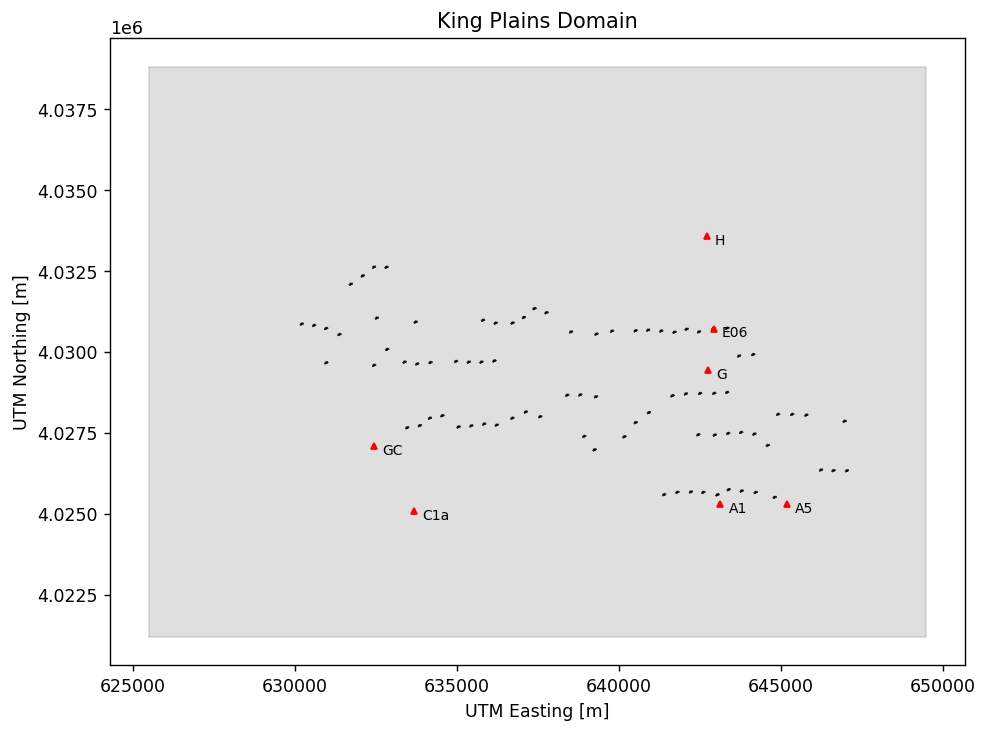

In [6]:
# Plot turbines + domain
fig, ax = plt.subplots(figsize=(8,6), facecolor='w', dpi=125)

lidarsam = [x for x in case.listboxpopupwindict['listboxsampling'].getitemlist() if x.startswith('lidar') ]

case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'
case.popup_storteddata['plotdomain']['plot_refineboxes']     = [] 
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = False

case.popup_storteddata['plotdomain']['plot_sampleprobes_legend'] = "{'title':'Sampling probes', 'fontsize':6, 'loc':'upper right', 'markerscale':2}"
case.popup_storteddata['plotdomain']['plot_sampleprobes_style']  = "{'markersize':5, 'marker':'.', 'linestyle':'None', }"
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = [] #lidarsam
case.plotDomain(ax=ax, verbose=False)

# Plot measurement sites
for k, g in mdict.items():
    #print(k)
    x, y = g['utmx'], g['utmy']
    ax.plot(x,y, 'r^', markersize=3)
    ax.text(x+250, y-250, k[4:], fontsize=8)

ax.set_title('King Plains Domain')
ax.set_xlabel('UTM Easting [m]')
ax.set_ylabel('UTM Northing [m]')
ax.set_aspect('equal')
plt.tight_layout()
   
if saveplots:
    plt.savefig(figdir+'/KP_Domain_lidar.png')

## Plot the refinement regions

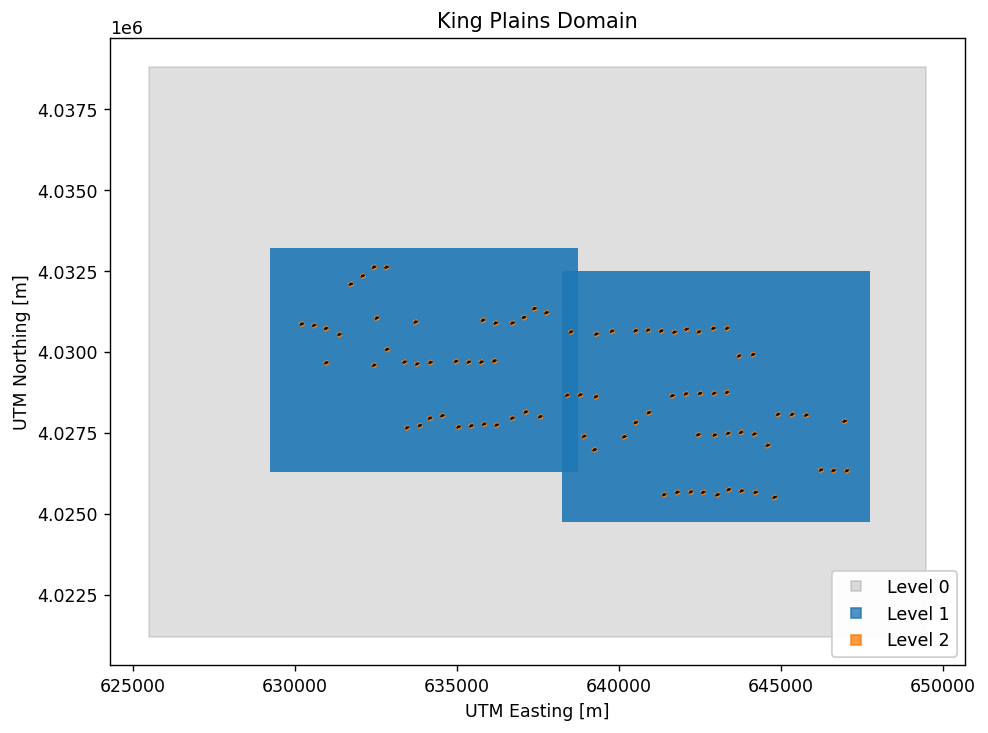

In [7]:
# Plot the domain (total domain)
fig, ax = plt.subplots(figsize=(8,6), facecolor='w', dpi=125)
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = False
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'
case.plotDomain(ax=ax)

ax.set_title('King Plains Domain')
ax.set_xlabel('UTM Easting [m]')
ax.set_ylabel('UTM Northing [m]')
ax.set_aspect('equal')
plt.tight_layout()

if saveplots:
    plt.savefig(figdir+'/KP_Domain_refinement.png')